# Read PDBBInd files (moleculesm, proteins , pockets)

In [1]:
def read_pdb_files(_file):
    contents = []
    with open(_file, 'r') as f:
        for line in f.readlines():
            if line[0] != "#":
                splitted_elements = line.split()
                contents.append(splitted_elements)
                #contents.append(splitted_elements[:5] + [' '.join(splitted_elements[5:])])
    return contents

In [2]:
import pandas as pd
from pathlib import Path
from rdkit import Chem
from rdkit.Chem import PandasTools
import os


data_path = Path('C:/Experiments/HQ-DTA/data/PDBBind_2020')

pdb_path_i = data_path /  'refined'
pdb_path_g = data_path /  'general'
pdb_path_c = data_path /  'CASF-2016/coreset'

index_label_file_i =  data_path  /  'refined/INDEX_refined_data.2020'
index_name_file_i = data_path  /  'refined/INDEX_refined_name.2020'

index_label_file_g =  data_path  /  'general/INDEX_general_PL_data.2020'
index_name_file_g = data_path  /  'general/INDEX_general_PL_name.2020'

index_label_file_c =  data_path  /  'CASF-2016/coreset/INDEX_core_data.txt'
index_name_file_c = data_path  /  'CASF-2016/coreset/????'

In [ ]:
############### refined 

contents = read_pdb_files(index_label_file_i)
#           INDEX_refined_data
#df = pd.DataFrame(contents)
#e.t.c 2r58  2.00  2007   2.00  Kd=10mM       // 2r58.pdf (MLY)
df_i = pd.DataFrame(contents, columns=(
                'PDB_code', 'resolution', 'release_year',
                '-logKd/Ki', 'Kd/Ki', 'for_delete', 'reference', 'ligand_name')) 
del df_i['for_delete']
#print(df_i.head)

pdbs = df_i['PDB_code'].tolist()
    
df_i.loc[:, 'ligand_files_sdf'] = [os.path.join(pdb_path_i, pdb, '{}_ligand.sdf'.format(pdb)) for pdb in pdbs]
df_i.loc[:, 'ligand_files_mol2'] = [os.path.join(pdb_path_i, pdb, '{}_ligand.mol2'.format(pdb)) for pdb in pdbs]
df_i.loc[:, 'protein_files'] = [os.path.join(pdb_path_i, pdb, '{}_protein.pdb'.format(pdb)) for pdb in pdbs]
df_i.loc[:, 'pocket_files'] = [os.path.join(pdb_path_i, pdb, '{}_pocket.pdb'.format(pdb)) for pdb in pdbs]

In [ ]:
df_i.head

In [ ]:
############### GENERAL 
contents = read_pdb_files(index_label_file_g)
#           INDEX_refined_data
#df = pd.DataFrame(contents)
#e.t.c 2r58  2.00  2007   2.00  Kd=10mM       // 2r58.pdf (MLY)
df_g = pd.DataFrame(contents, columns=(
                'PDB_code', 'resolution', 'release_year',
                '-logKd/Ki', 'Kd/Ki', 'for_delete', 'reference', 'ligand_name', 'for_delete2')) 
del df_g['for_delete']
del df_g['for_delete2']
#print(df_i.head)

pdbs = df_g['PDB_code'].tolist()
    
df_g.loc[:, 'ligand_files_sdf'] = [os.path.join(pdb_path_g, pdb, '{}_ligand.sdf'.format(pdb)) for pdb in pdbs]
df_g.loc[:, 'ligand_files_mol2'] = [os.path.join(pdb_path_g, pdb, '{}_ligand.mol2'.format(pdb)) for pdb in pdbs]
df_g.loc[:, 'protein_files'] = [os.path.join(pdb_path_g, pdb, '{}_protein.pdb'.format(pdb)) for pdb in pdbs]
df_g.loc[:, 'pocket_files'] = [os.path.join(pdb_path_g, pdb, '{}_pocket.pdb'.format(pdb)) for pdb in pdbs]


In [ ]:
df_g.shape

In [41]:
############### CORE  
#elegxw an yparxoyn eggrafes toy core mesa sto refined gia na tis afairesw
#sto general den yparxoyn eggrafew toy refined


contents = read_pdb_files(index_label_file_c)

#code   resl     year    logKa    Ka           target
df_c = pd.DataFrame(contents, columns=(
                'PDB_code', 'resolution', 'release_year',
                '-logKd/Ki', 'Kd/Ki',  'target')) 

pdbs = df_c['PDB_code'].tolist()

df_c.loc[:, 'ligand_files_sdf'] = [os.path.join(pdb_path_i, pdb, '{}_ligand.sdf'.format(pdb)) for pdb in pdbs]
df_c.loc[:, 'ligand_files_mol2'] = [os.path.join(pdb_path_i, pdb, '{}_ligand.mol2'.format(pdb)) for pdb in pdbs]
df_c.loc[:, 'protein_files'] = [os.path.join(pdb_path_i, pdb, '{}_protein.pdb'.format(pdb)) for pdb in pdbs]
df_c.loc[:, 'pocket_files'] = [os.path.join(pdb_path_i, pdb, '{}_pocket.pdb'.format(pdb)) for pdb in pdbs]

In [42]:
print(df_c.shape)

(285, 10)


In [ ]:
#delete general common with refined
#common = df_g.merge(df_i, on='PDB_code')
df_g = df_g[~df_g['PDB_code'].isin(df_i['PDB_code'])]

In [ ]:
df_g.shape

In [ ]:
df_g.head()
df_g.reset_index(inplace=True, drop=True)

In [ ]:
#delete refined common with core
#common = df_i.merge(df_c, on='PDB_code')
df_i = df_i[~df_i['PDB_code'].isin(df_c['PDB_code'])]

In [ ]:
df_i.head()
df_i.reset_index(inplace=True, drop=True)
#df_i.reset_index(drop=True) #den isxyei telika

In [5]:
def get_smiles(df): 
    err_mols2=[]
    for i in range(len(df)):
        mol2_file = df.loc[i, 'ligand_files_mol2']
        mol2_file = mol2_file.replace('\\', '/')
        try:
            m = Chem.rdmolfiles.MolFromMol2File(mol2_file)
            df.loc[i, 'smi_isomeric']  = Chem.MolToSmiles(m)
            df.loc[i, 'smi_canonical'] = Chem.MolToSmiles(m, isomericSmiles=False)   
        except:
            #print(mol2_file, '\n')   
            err_mols2.append(df.loc[i, 'PDB_code'])
            pass 

    print('errors ', len(err_mols2), err_mols2)

In [ ]:
get_smiles(df_g)

In [ ]:
df_g.head()

In [ ]:
print(df_g.shape)

In [10]:
def delete_null(df):
    # rows with NaNs values
    nans = df[df.isnull().any(axis=1)]
    print(nans.shape)
    df = df[df.smi_canonical.notnull()]
    df.reset_index(inplace=True, drop=True)
    return df

In [ ]:
df_g = delete_null(df_g)

In [ ]:
df_g.shape

In [ ]:
get_smiles(df_c)
print(df_c.shape)

In [ ]:
df_c = delete_null(df_c)

# read sequence and uniprot from sites

In [ ]:
#read sequence from https://www.ebi.ac.uk/pdbe
import requests

err_prots=[]
for i in range(len(df_i)):
    code = df_i.loc[i, 'PDB_code']
    try:
        data = requests.get(f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/molecules/{code}').json()[code.lower()]
        df_i.loc[i, 'molecule_type'] = data[0]['molecule_type']
        df_i.loc[i, 'sequence']      = data[0]['sequence']    
    except: 
        err_prots.append(df_i.loc[i, 'PDB_code'])
        pass 

print('errors ', err_prots)



#code = '1f4x'
#data = requests.get(f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/molecules/{code}').json()[code.lower()]
#print(data)
#print(data[0]['molecule_type'])
#print(data[0]['sequence'])

#print('****')

#data_2 = requests.get(f'https://www.ebi.ac.uk/pdbe/api//mappings/uniprot/{code}?pretty=true').json()[code.lower()]
#print(data_2)

In [ ]:
df_i.to_csv("C:/Experiments/HQ-DTA/data/refined_data_2020.csv", sep ='\t')

In [ ]:
import requests

err_prots_2=[]
sep=',' 
for i in range(len(df_i)):
    code = df_i.loc[i, 'PDB_code']
    try:
        data = requests.get(f'https://www.ebi.ac.uk/pdbe/api//mappings/uniprot/{code}?pretty=true').json()[code.lower()]
        df_i.loc[i, 'Uniprot'] = sep.join(list(data['UniProt'].keys()))
    except: 
        err_prots_2.append(df_i.loc[i, 'PDB_code'])
        pass 

print('errors ', err_prots_2)

In [ ]:
# yparxoyn kai sequence oxi me A alla R, S e.t.c Den briskei ta sequence gia 312 proteines
from Bio import SeqIO
PDB_file_path = 'C:/Experiments/HQ-DTA/data/PDBBind_2020/PDBbind_v2020_refined/refined-set/1a1e/1a1e_protein.pdb' 
query_chain_id = 'A'

chain = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}
print(chain)
query_chain = chain[query_chain_id]
print(query_chain)

In [ ]:
# yparxoyn kai sequence oxi me A alla R, S e.t.c Den briskei ta sequence gia 312 proteines
from Bio import SeqIO
PDB_file_path = 'C:/Experiments/HQ-DTA/data/PDBBind_2020/PDBbind_v2020_refined/refined-set/1a1e/1a1e_protein.pdb' 

records = list(SeqIO.parse(PDB_file_path, 'pdb-seqres'))

print(records[0].id)

print(records[0].seq)
      



In [ ]:
import requests
code = '5ulp'

data_2 = requests.get(f'https://www.ebi.ac.uk/pdbe/api//mappings/uniprot/{code}?pretty=true').json()[code.lower()]
print(data_2)
print(type(data_2))

keysList = list(data_2['UniProt'].keys())
print(keysList)

keysList = list(data_2['UniProt'].keys())
print(keysList)


sep=","
a = sep.join(list(data_2['UniProt'].keys()))
print(a)

In [ ]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
parser = PDBParser(PERMISSIVE=1)

In [ ]:
structure_id = "2r58"
filename = "C:/Experiments/HQ-DTA/data/PDBBind_2020/PDBbind_v2020_refined/refined-set/2r58/2r58_protein.pdb"
structure = parser.get_structure(structure_id, filename)
print(structure)

In [ ]:
def get_sequence_from_pdbid(pdbid):
    data = requests.get("https://data.rcsb.org/rest/v1/core/polymer_entity/" + pdbid + "/1")
    pdb_data = data.json()
    polymer_entity = pdb_data["entity_poly"]    
    sequence = polymer_entity["pdbx_seq_one_letter_code"]
    return sequence

In [ ]:
import requests
seq = get_sequence_from_pdbid('1a1e')
print(seq)


In [ ]:
#Read sequence from pdb files
#structure = p.get_structure(df_i.loc[i, 'PDB_code'], df_i.loc[:, 'protein_files'])
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder

code = "1a1e"
filename = "C:/Experiments/HQ-DTA/data/PDBBind_2020/PDBbind_v2020_refined/refined-set/1a1e/1a1e_protein.pdb"        
    
err_prots_pdb_2 = []
p   = PDBParser()
ppb = PPBuilder()
for i in range(1):#range(len(df_i)):
    #try:
        #structure = p.get_structure(df_i.loc[i, 'PDB_code'], df_i.loc[:, 'protein_files'])
        structure = p.get_structure(code, filename)
        print(structure[0])
        pp = ppb.build_peptides(structure[0])
        print(pp)
        seq = pp[0].get_sequence()   
        print(seq)
        
        #model = structure[0]
        #chain = model['A']

        #seq = pp.get_sequence().__str__()
        #print(seq)
        #df_i.loc[i, 'sequence_from_pdb']      = data[0]['sequence']    
    #except: 
    #    err_prots_pdb_2.append(df_i.loc[i, 'PDB_code'])
    #    pass 

print('errors ', err_prots_pdb_2)



 # READ sequence and uniprot id from files
 # Caution for pocket files 

In [46]:
#read sequence from protein.pdb
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
from Bio import SeqIO

In [47]:
def get_sequence(df):
    err_prots_f=[]
    p, ppb   = PDBParser(),  PPBuilder()
    for i in range(len(df)):
        code = df.loc[i, 'PDB_code']
        filename = df.loc[i, 'protein_files']
        try:
            records = list(SeqIO.parse(filename, 'pdb-seqres'))
            df.loc[i, 'sequence_file']  = str(records[0].seq)   #get the first sequence 
        except: 
            err_prots_f.append(df.loc[i, 'PDB_code'])
            pass 

    print('errors from file ', len(err_prots_f), err_prots_f)

In [ ]:
get_sequence(df_c)

In [ ]:
df_c.shape

In [ ]:
df_c.head()


In [52]:
# read Uniport from  INDEX_name_file
#etc. 1n4k  2002  P11881  INOSITOL 1,4,5-TRISPHOSPHATE RECEPTOR TYPE 1
# Από την στήλη 3 και μετά είναι το όνομα του target
# θα πάρω την αντιστοίχηση από το index_name_file αλλά υπάρχουν εγγραφές με ----
# Χρησιμοποιώ το https://www.ebi.ac.uk/pdbe/api//mappings/


def get_uniprot(filename):
    contents = read_pdb_files(filename)
    df = pd.DataFrame(contents)
    print('max ', df.shape[1])
    max_col = df.shape[1]
    df.loc[:,max_col]=""
    df.loc[:, max_col] = df.loc[:, max_col].map(str) + ' ' + df.loc[:,3].map(str) + ' ' +  df.loc[:,4].map(str) + ' ' +  df.loc[:,5].map(str) + ' ' + df.loc[:,6].map(str) + ' ' + df.loc[:,7].map(str) + ' ' + df.loc[:,8].map(str) + ' ' + df.loc[:,9].map(str) + ' ' + df.loc[:,10].map(str) + ' ' + df.loc[:,11].map(str)
    return df
    
    

#cols = range(3, max_col)
#print(cols)
#
# Δεν παίζει το for loop
#for  c in cols:
#    print(c)
#    df_n.loc[:, max_col] = df_n.loc[:, max_col] + df_n.loc[:,c]


In [ ]:
df_n = get_uniprot(index_name_file_i)

In [ ]:
print(df_n.head)

In [ ]:
df_n.shape

In [56]:
#df_n = df_n.drop([1, 3, 4,5,6,7,8,9,10,11], axi121)#
df_n = df_n[[0 , 2  ,12]] #12 gia to refined
#df_n = df_n[[0 , 2  ,15]] #15 gia to general


In [ ]:
df_n.head()

In [58]:
df_n.columns =['PDB_code','Uniprot',  'protein_name']

In [59]:
#prosoxi prepei na antikatstisw ti lexi None
df_n["protein_name"] = df_n["protein_name"].apply(lambda x: x.replace("None", ""))

In [ ]:
print(df_c.shape)
print(df_n.shape)


In [61]:
# join two datasetes
#df_i = df_i.set_index('PDB_code').join(df_n.set_index('PDB_code'))
df_c = df_c.set_index('PDB_code').join(df_n.set_index('PDB_code'))


In [ ]:
df_c.head()

In [63]:
df_c.to_csv("C:/Experiments/HQ-DTA/data/CASF_2016_core_data_cas.csv", sep ='\t')

#ayta oy bgazoyn mhnyma pane sta problematic array


In [74]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
'''
function to estimate molecule descriptors
Α) από το Chem
ALL
OR τα  πιο πολλά Paper έχουν τα παρακάτω 6 
 1.molecular weight, 
 2.logP (the octanol/water partition coefficient, i.e., notion of lipophilicity) lipophilicity 
 3.hydrogen bond donors,
 5.hydrogen bond acceptors, 
 5.topological polar surface area,
 6.number of rotatable bonds.
 -------------
 Descriptors
 https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors
 https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
 
 Β) Μια άλλη κατηγορία είναι τα  
 Molecular pairing energies (MPE) (υπολογίζει την ενέργεια ανά ζευγάρι ατόμων)
 https://www.mdpi.com/2079-9292/10/23/2981#B44-electronics-10-02981
 
'''

def get_descriptors(smiles, all_desc=False,verbose=False):
    moldata= []
    problematic_smiles=[]
    columnNames=[]
    for i,elem in enumerate(smiles):
        try:
            #print('elem - ', i, ' ', elem)
            mol = Chem.MolFromSmiles(elem)
            if mol is None:
                problematic_smiles.append(elem)
            else:    
                #mol = rdMolStandardize.Cleanup(mol)
                #print('mol - ', i, ' ', mol)
                moldata.append(mol)  
        except:
            problematic_smiles.append(elem)
            pass
        
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:
        if all_desc:
            vals = chem.Descriptors.CalcMolDescriptors(mol)
            row = np.array(list(vals.values()))
        else:      
            row = np.array([
                        #Chem.MolToSmiles(mol), #canonical
                        round(Descriptors.MolWt(mol),2),
                        round(Descriptors.MolLogP(mol),2), #lipophilicity 
                        round(Descriptors.NumHDonors(mol),2),
                        round(Descriptors.NumHAcceptors(mol),2),
                        round(Descriptors.TPSA(mol),2),
                        round(Descriptors.NumRotatableBonds(mol),2)])   

        if(i==0):
            baseData=np.vstack([row])
            if all_desc: columnNames_first=list(vals)
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    if all_desc:
        columnNames=columnNames_first
    else:
        columnNames=[#"smi_canonical",
                     "MW","LogP","NumHDonors","NumHAcceptors","TPSA","NumRotatableBonds"]  
    
    #print('baseData', baseData)
    #print('problematic_smiles', problematic_smiles)
    problematic_smiles = pd.DataFrame(problematic_smiles)
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return  descriptors,problematic_smiles

In [75]:
import pandas as pd
from pathlib import Path
import numpy as np

    
df_tmp = pd.read_csv('C:/Experiments/HQ-DTA/data/CASF_2016_core_data.csv', sep ='\t' )
df_descriptors, df_problematic_smiles = get_descriptors(df_tmp['smi_canonical'], all_desc=False)

In [ ]:
print(df_descriptors.shape)
#print(df_descriptors)

print(df_problematic_smiles.shape)

In [ ]:
df_c.reset_index(inplace=True, drop=True)
df_c.head()

In [ ]:
df_c_2 = df_c.join(df_descriptors )
df_c_2.head()

In [ ]:
tmp = df_descriptors
print(tmp.shape)
tmp = tmp.drop_duplicates(subset=["smi_canonical"])
print(tmp.shape)
#print(df_problematic_smiles)  

In [ ]:
# Παρακάτω έψαχνα να βρω τις 6 εγγραφές που δεν υπάρχουν στο general

In [ ]:
df_problematic_smiles

In [ ]:
print(df_tmp.shape)
df_descriptors.shape

In [ ]:
common = pd.merge(df_tmp, tmp, on='smi_canonical', how='inner')

#df_i.reset_index(inplace=True, drop=True)
# join two datasetes
#df_i_2 = df_i.join(df_descriptors)

In [ ]:
common.shape

In [80]:
df_c_2.to_csv("C:/Experiments/HQ-DTA/data/CASF_2016_core_data_with_descriptors.csv", sep ='\t')

In [ ]:
df_problematic_smiles.to_csv("C:/Experiments/HQ-DTA/data/general_data_2020_get_descriptors_problemic.csv", sep ='\t')

In [ ]:
#briskw ta koina
df_tmp = df_tmp.drop_duplicates(subset=["smi_canonical"])

df_tmp.shape

In [ ]:
common_2.shape

In [ ]:
print(tmp.shape)
print(df_tmp.shape)



In [ ]:
tmp1['smi_canonical'] = tmp['smi_canonical']
tmp2['smi_canonical'] = df_tmp['smi_canonical']
tmp1.set_index('smi_canonical')
tmp2.set_index('smi_canonical')



In [ ]:
tmp1.head()

In [ ]:
tmp2['match'] = np.where(tmp1['smi_canonical'] == tmp2['smi_canonical'], 'True', 'False')

In [ ]:
# ***************KATANOMH******************
import pandas as pd
from pathlib import Path

from matplotlib import pyplot
# generate regression dataset
#X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

df = pd.read_csv('C:/Experiments/HQ-DTA/data/pdbbind2020_training.csv', sep ='\t' )

df.head()

In [2]:
X= df.to_numpy() 

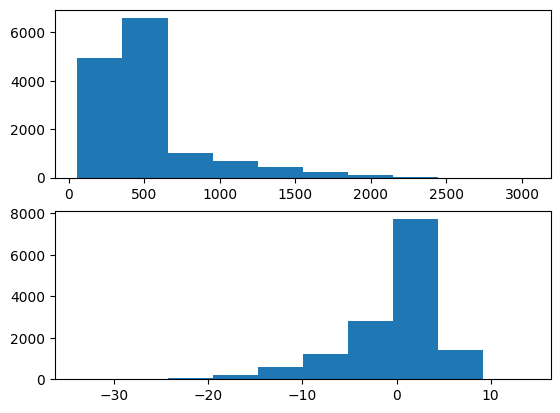

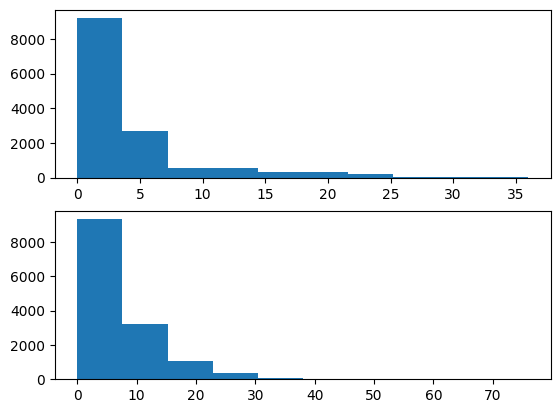

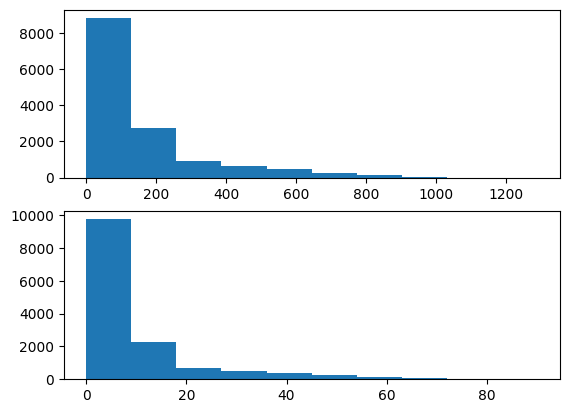

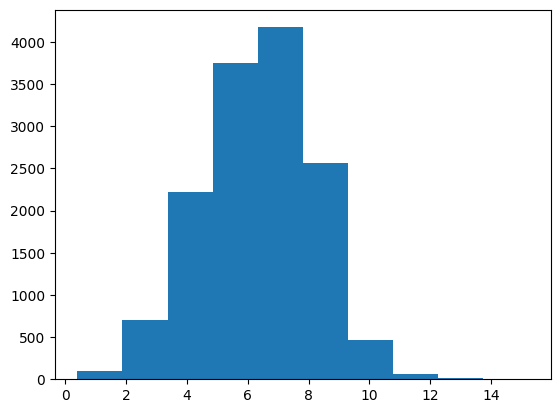

In [4]:
#17 έως 22
#MW	LogP	NumHDonors	NumHAcceptors	TPSA	NumRotatableBonds

# histograms of input variables
pyplot.subplot(211)
pyplot.hist(X[:, 17]) # 

#pyplot.subplot(212)
#pyplot.hist(X[:, 23]) # rescale
#pyplot.show()


pyplot.subplot(212)
pyplot.hist(X[:, 18])
pyplot.show()

pyplot.subplot(211)
pyplot.hist(X[:, 19])
pyplot.subplot(212)
pyplot.hist(X[:, 20])
pyplot.show()

pyplot.subplot(211)
pyplot.hist(X[:, 21])
pyplot.subplot(212)
pyplot.hist(X[:, 22])

pyplot.show()
# histogram of target variable  logKd/Ki
pyplot.hist(X[:, 4]) 
pyplot.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
def get_scalers(data_path, phase, name):    
    def get_scaler(df,col):
        return MinMaxScaler().fit(df[[col]])

    data_path = Path(data_path)
    df = pd.read_csv(data_path / f"{name}_{phase}.csv", sep='\t')
    data_scalers = {col: get_scaler(df, col)
                       for col in ['MW', 'LogP','NumHDonors','NumHAcceptors','TPSA','NumRotatableBonds', '-logKd/Ki']}
    return data_scalers

In [16]:
df['NumHAcceptors_s'] =  scalers['NumHAcceptors'].transform(df[['NumHAcceptors']])

In [6]:
scalers=get_scalers('C:/Experiments/HQ-DTA/data/', 'training','pdbbind2020' )

In [63]:
for c in scalers:
     df[c]= scalers[c].transform(df[[c]])

In [11]:
df_v = pd.read_csv('C:/Experiments/HQ-DTA/data/pdbbind2020_validation.csv', sep ='\t' )

In [17]:
df_v['NumHAcceptors_s'] =  scalers['NumHAcceptors'].transform(df_v[['NumHAcceptors']])

In [ ]:
df[df["NumHAcceptors"] == 29]

In [ ]:
df_v[df_v["NumHAcceptors"] == 29]

In [ ]:
df_v.head() #310.34 - > 0.084906 

In [ ]:
df.NumHAcceptors.unique()

In [ ]:
df_v.NumHAcceptors.unique()